In [2]:
from fastai.vision.all import *
from pathlib import Path

In [6]:
key = ''

In [8]:
path = Path.cwd()/'datasets/birds/'

In [9]:
path

Path('/home/fastai-2020-lalkrishna/My-files/Projects/datasets/birds')

In [48]:
birds_type = 'parrots', 'owls', 'columbidae'

if not path.exists():
    path.mkdir()
    
for bird in birds_type:
    dest = (path/bird)
    dest.mkdir(exist_ok = True)
    results = search_images_bing(key, bird)
    download_images(dest, urls=results.attrgot('contentUrl'))

In [92]:
fns = get_image_files(path)
failed = verify_image(fns)
failed

False

In [10]:
birds = DataBlock(
    blocks = (ImageBlock, CategoryBlock),
    get_items = get_image_files,
    splitter = RandomSplitter(valid_pct = .2, seed = 42),
    get_y = parent_label,
    item_tfms = Resize(128)
)

In [13]:
dls = birds.dataloaders(Path.cwd()/'../datasets/birds')

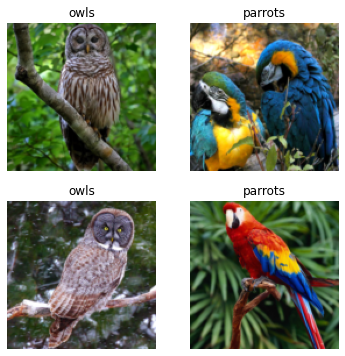

In [14]:
dls.valid.show_batch(max_n=4)

In [16]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(20)

epoch,train_loss,valid_loss,error_rate,time
0,1.549646,0.247531,0.095238,00:06


epoch,train_loss,valid_loss,error_rate,time
0,0.476876,0.144932,0.071429,00:05
1,0.387160,0.090144,0.035714,00:05
2,0.298691,0.100142,0.035714,00:05
3,0.226907,0.134953,0.035714,00:06
4,0.182497,0.155968,0.035714,00:06
5,0.148380,0.164884,0.047619,00:05
6,0.122303,0.177073,0.035714,00:05
7,0.105463,0.175050,0.035714,00:05
8,0.088767,0.157804,0.035714,00:05
9,0.078598,0.139792,0.035714,00:05


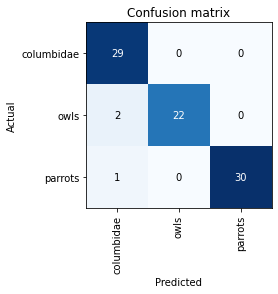

In [17]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

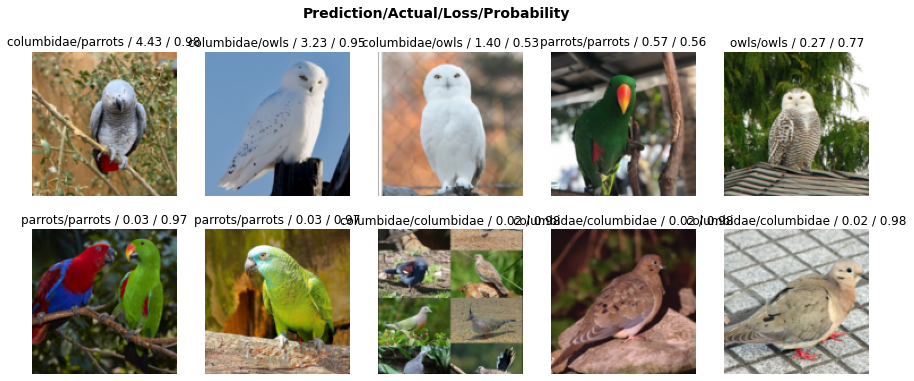

In [19]:
interp.plot_top_losses(10, nrows = 2)